In [1]:
import diagonalizer
from diagonalizer import diagonalize_1D, density_plot_1D, pSweep_1D, spectrum_plot_1D, FermiVelocityZQL

import numpy as np
from numpy import pi
from copy import copy
# for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt

#Some global and default parameters
SitesCount_XDefault = 400
fsys_1D = diagonalizer.FinalizedSystem_1D(SitesCount_XDefault)

#The parameters with dimension of energy are measured in units of t
#The lattice parameters (apart from the number of lattice sites) seem to be the same as in Fig.1 of Baireuther et al. 16
#lBinv2 = a_0^2 / l_B^2, where a_0 is the lattice spacing, lB is the magnetic length
ParametersDefault = diagonalizer.SimpleNamespace( tp=2., t=1., tzp=1., tz=1., M0=-0.3, FermiEnergy = 0., \
                     betaz=1.2, b0=0.1, pzNode2 = -0.6314028, \
                     Rescale_hop0 = 1.0, Rescale_onsite0 = 1.0, Rescale_onsite1 = 1.0, \
                     EnergyNode2 = 0.049189807,
                     lBinv2=0., x_shift= (SitesCount_XDefault - 1.)/2., \
                     EigenvectorsCount = 50, EnergyPrecision = 10**(-5), WavefunctionComponents = 4, \
                     py = 0., pz = 0. )

pzMin = -1
pzMax = 1
pzCount = 30

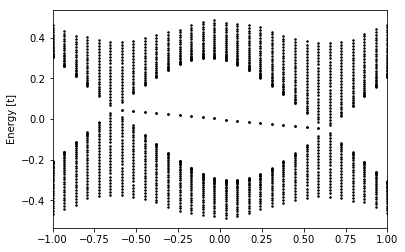

In [2]:
params = copy(ParametersDefault)

evals, evecs = pSweep_1D( fsys_1D, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals,pzMin,pzMax,pzCount)

del params, evals, evecs

## Extraction of the z-velocity of the Fermi arcs

### Extraction of the velocity for $p^z$ around a Weyl node

In [3]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
params = copy(ParametersDefault)

params.pz = params.pzNode2
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals, 'while the expected Weyl-node energy is', params.EnergyNode2)


params.pz = params.pzNode2 + 0.01
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


params.pz = params.pzNode2 + 0.05
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((0.04851469 - params.EnergyNode2)/0.01)
print((0.0457664 - params.EnergyNode2)/0.05)


del fsys_finerResolution, params, evals, evecs

[ 0.04799216  0.04877692  0.04956169  0.05034646] while the expected Weyl-node energy is 0.049189807
[ 0.04851469  0.04851469  0.05599382  0.05613517]
[ 0.0457664   0.0457664   0.08269876  0.08272621]
-0.06751170000000029
-0.06846814000000007


### Extraction of the velocity for $p^z$ in between the Weyl nodes (TO REVISE: maybe it is better to Taylor-expand around $p^z=0$ instead?)

In [43]:
params = copy(ParametersDefault)

#If I make 8000 sites instead of 7000, the numerical error appears somehow 
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(7000)
params.pz = 0.
params.FermiEnergy = 0.
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
params.pz = 0.05
params.FermiEnergy = 0.
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((-0.00416493)/0.05)


del fsys_finerResolution, params, evals, evecs

[ -2.95881015e-01   5.08635444e-19   9.20209656e-18   2.95910607e-01]
[-0.00416493 -0.00416493  0.2849755   0.28503678]
-0.08329859999999999


### The FA spectrum is odd wrt $(p^z,p^y) \to (-p^z,-p^y)$

In [76]:
params = copy(ParametersDefault)

fsys_finerResolution = diagonalizer.FinalizedSystem_1D(1000)
params.EigenvectorsCount = 4

params.FermiEnergy = 0.
params.pz = 0.3
params.py = 0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.
params.pz = -0.3
params.py = -0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


params.EigenvectorsCount = 15
params.FermiEnergy = 0.0
params.pz = 0.3
params.py = 0.2
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


params.EigenvectorsCount = 15
params.FermiEnergy = 0.0
params.pz = -0.3
params.py = -0.2
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


del fsys_finerResolution, params, evals, evecs

[-0.22359902  0.17434565  0.2524964   0.25270577]
[-0.25270629 -0.25249908 -0.17434565  0.22359902]
[-0.42058329  0.37132993  0.4149784   0.41511229  0.41533535  0.4156474
  0.41604823  0.41653755  0.41711503  0.41778026  0.41853279  0.41937212
  0.42029765  0.42130882  0.42240559]
[-0.42240524 -0.4213089  -0.42029771 -0.41937223 -0.4185328  -0.41778026
 -0.41711503 -0.41653755 -0.41604823 -0.4156474  -0.41533535 -0.41511229
 -0.4149784  -0.37132993  0.42058329]


### Somehow the FA spectrum is additively separable wrt $p^z$ and $p^y$, even at the level of the microscopic theory!

In [140]:
params = copy(ParametersDefault)

fsys_finerResolution = diagonalizer.FinalizedSystem_1D(1000)
params.EigenvectorsCount = 4

params.FermiEnergy = 0.
params.pz = -0.1
params.py = 0.
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.FermiEnergy = 0.
params.pz = 0.
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.pz = -0.1
params.py = 0.05
params.FermiEnergy = -0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(-0.09961066+0.00831945)

params.FermiEnergy = 0.1
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(0.09961066+0.00831945)


del fsys_finerResolution, params, evals, evecs

[-0.26941774 -0.26919804  0.00831945  0.00831945]
[-0.31331972 -0.09961066  0.09961066  0.31331672]
[-0.28761516 -0.28727505 -0.28707223 -0.0912912 ]
-0.09129121
[-0.0912912   0.10793011  0.31887111  0.31907523]
0.10793011000000001


## Deformation of the boundary condition

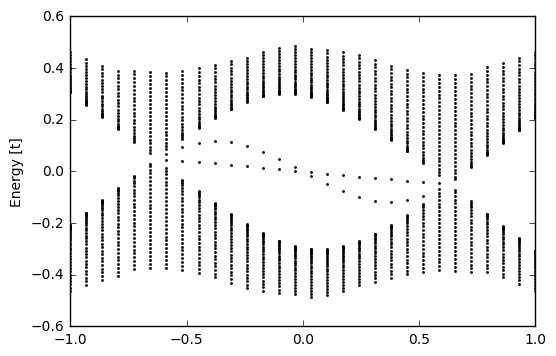

In [2]:
params = copy(ParametersDefault)
params.Rescale_b0_0 = 10.0
# params.Rescale_onsite0 = 3.
# params.Rescale_onsite1 = 3.

evals, evecs = pSweep_1D( fsys_1D, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals,pzMin,pzMax,pzCount)

del params, evals, evecs

### Extraction of the velocity for $p^z$ around a Weyl node

In [9]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
params = copy(ParametersDefault)
params.Rescale_b0_0 = 10.0
# params.Rescale_onsite0 = 3.
# params.Rescale_onsite1 = 3.

params.pz = params.pzNode2
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 4
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals, 'while the expected Weyl-node energy is', params.EnergyNode2)


params.pz = params.pzNode2 + 0.05
params.FermiEnergy = params.EnergyNode2
params.EigenvectorsCount = 6
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


#The extraction of the FA spectrum is made manually so far
print((0.07119143 - params.EnergyNode2)/0.05)
print((0.0457664 - params.EnergyNode2)/0.05)


del fsys_finerResolution, params, evals, evecs

[ 0.04809845  0.04888322  0.04966799  0.05045276] while the expected Weyl-node energy is 0.049189807
[ 0.0457664   0.07119143  0.08269885  0.08272656  0.08277269  0.08283716]
0.44003245999999996
-0.06846814000000007


### Extraction of the velocity for $p^z$ that is just in between the Weyl nodes

In [16]:
# params = copy(ParametersDefault)
# params.Rescale_b0_0 = 10.0

#If I make 8000 sites instead of 6000, the numerical error appears somehow 
# fsys_finerResolution = diagonalizer.FinalizedSystem_1D(6000)
# params.pz = 0.
# params.FermiEnergy = 0.
# params.EigenvectorsCount = 4
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)


# fsys_finerResolution = diagonalizer.FinalizedSystem_1D(8000)
# params.pz = 0.05
# params.FermiEnergy = 0.
# params.EigenvectorsCount = 6
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)


#The extraction of the FA spectrum is made manually so far
# print((-0.00416493)/0.05)
# print((-0.02400524)/0.05)


# del fsys_finerResolution, params, evals, evecs

### The FA spectrum is still odd wrt $(p^z,p^y) \to (-p^z,-p^y)$

In [14]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(1000)

params = copy(ParametersDefault)
params.Rescale_b0_0 = 10.0
# params.Rescale_onsite0 = 3.
# params.Rescale_onsite1 = 3.


params.EigenvectorsCount = 10
params.FermiEnergy = -0.0
params.pz = 0.2
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.EigenvectorsCount = 10
params.FermiEnergy = 0.0
params.pz = -0.2
params.py = -0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)


del fsys_finerResolution, params, evals, evecs

[-0.11616643  0.00146127  0.24521127  0.2454339   0.24580454  0.24632256
  0.24698711  0.2477971   0.24875121  0.2498479 ]
[-0.2498479  -0.24875121 -0.2477971  -0.24698711 -0.24632256 -0.24580454
 -0.2454339  -0.24521127 -0.00146127  0.11616643]


### But the deformed FA spectrum is no longer separable!

In [18]:
fsys_finerResolution = diagonalizer.FinalizedSystem_1D(4000)

params = copy(ParametersDefault)
params.Rescale_b0_0 = 10.0
# params.Rescale_onsite0 = 3.
# params.Rescale_onsite1 = 3.

params.EigenvectorsCount = 4
params.FermiEnergy = 0.
params.pz = -0.1
params.py = 0.
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.EigenvectorsCount = 6
params.FermiEnergy = 0.
params.pz = 0.
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)

params.EigenvectorsCount = 10
params.FermiEnergy = -0.05
params.pz = -0.1
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(0.00831945 - 0.09961066)

params.EigenvectorsCount = 10
params.FermiEnergy = 0.05
params.pz = -0.1
params.py = 0.05
evals, evecs = diagonalize_1D(fsys_finerResolution,params)
print(evals)
print(0.04710528 + 0.08440131)


del params, evals, evecs

[-0.26914429 -0.26913068  0.00831945  0.04710528]
[-0.31325681 -0.31324435 -0.09961066  0.08440131  0.31324435  0.31325682]
[-0.28727759 -0.28721363 -0.28715818 -0.28711126 -0.28707286 -0.28704299
 -0.28702165 -0.28700885 -0.0912912   0.13218837]
-0.09129121
[-0.0912912   0.13218837  0.31880747  0.31882036  0.31884183  0.31887188
  0.31891052  0.31895773  0.31901352  0.31907789]
0.13150658999999998


### Let us find several valus of FA energy, in order to interpolate it in Mathematica

In [19]:
# fsys_finerResolution = diagonalizer.FinalizedSystem_1D(6000)

# params = copy(ParametersDefault)
# params.Rescale_b0_0 = 10.0
# params.EigenvectorsCount = 6
# params.py = 0.


# params.FermiEnergy = 0.
# params.pz = -0.001
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.01
# params.pz = -0.1
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.01
# params.pz = -0.2
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.01
# params.pz = -0.3
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.01
# params.pz = -0.4
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.01
# params.pz = -0.5
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.05
# params.pz = -0.6
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.05
# params.pz = -0.61
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.FermiEnergy = 0.049
# params.pz = -0.62
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)


#Energy at an extra point, in order to check the validity of the interpolation
# params.FermiEnergy = 0.05
# params.py = -0.02
# params.pz = -0.6
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# del fsys_finerResolution, params, evals, evecs

### Fermi velocity along z around the Weyl node is significantly different from its $p^y=0$ value!

In [20]:
# params.FermiEnergy = 0.05
# params.py = -0.024

# params.pz = -0.6
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# params.pz = -0.55
# evals, evecs = diagonalize_1D(fsys_finerResolution,params)
# print(evals)

# (0.09138572-0.09488199)/0.05

# Now, let us turn the magnetic field

## Original boundary

In [3]:
params = copy(ParametersDefault)
params.lBinv2 = 1. / 50.**2

pzStart = -0.553
pzEnd = 0.703

In [18]:
GridNumber = 20
for i in range(GridNumber):
    params.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1D, params)
    print(velocityCash,end=',')
    
print('')

#VelocityIntegral = 0.
GridNumber = 40
for i in range(GridNumber):
    params.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1D, params)
    print(velocityCash,end=',')    
#    VelocityIntegral += velocityCash
# VelocityIntegral = VelocityIntegral * (pzEnd - pzStart) / GridNumber
# print(VelocityIntegral, -params.EnergyNode2)


del params, pzStart, pzEnd, GridNumber, velocityCash #, VelocityIntegral 

-0.479216674133,-0.134332604138,-0.1020819339,-0.0944769209242,-0.0903872868523,-0.0885539008031,-0.0875201941554,-0.0866876469269,-0.0857376866317,-0.0844519522638,-0.0826324637785,-0.0800398281618,-0.0762985215441,-0.0706797098848,-0.0615053304344,-0.0436475512387,-0.00540690586756,0.097585994278,0.332785735203,0.690725385414,
-0.479216674133,-0.192083573519,-0.136005012841,-0.11825068444,-0.102947003937,-0.096578522694,-0.0949786212891,-0.0923526952112,-0.0906636274933,-0.089526395584,-0.0887262075438,-0.0881314215787,-0.0876557612706,-0.0872393727743,-0.0868384339378,-0.0864190538996,-0.0859534655505,-0.0854174811984,-0.0847886295877,-0.084044605055,-0.0831617512812,-0.0821133176967,-0.0808671761627,-0.0793825531815,-0.0776050712721,-0.0754589035092,-0.0728339381928,-0.0695641986555,-0.0653910046755,-0.0599016827463,-0.0515519122471,-0.041095240869,-0.0252448366585,-0.00105874675242,0.0405820985331,0.10591171151,0.204280406455,0.340179766169,0.50987813957,0.690725385414,

In [19]:
pzStart = -0.553
pzEnd = 0.703

fsys_1DRefine = diagonalizer.FinalizedSystem_1D(800)
paramsRefine = copy(ParametersDefault)
paramsRefine.lBinv2 = 1. / 50.**2
paramsRefine.x_shift= (800 - 1.)/2.

GridNumber = 40
for i in range(GridNumber):
    paramsRefine.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1DRefine, paramsRefine)
    print(velocityCash,end=',')
    
    
del fsys_1DRefine, paramsRefine, pzStart, pzEnd, GridNumber, velocityCash

-0.482802265788,-0.192208639656,-0.132315863959,-0.115555838415,-0.102253771791,-0.0967398439288,-0.0924335940047,-0.088919547627,-0.0884434951317,-0.0855510862915,-0.087251360515,-0.0862704472985,-0.0856400534343,-0.0851687880711,-0.0847511977822,-0.0843292398109,-0.0838679068657,-0.083342203885,-0.0827305106151,-0.0820114181854,-0.0811621261763,-0.0801567424624,-0.0744658052733,-0.0775396668246,-0.0758254351157,-0.073729684604,-0.0710980022259,-0.0676122044102,-0.0624026974712,-0.0638248733572,-0.0515554695068,-0.0466890061848,-0.0252699312802,-0.00147247985378,0.0414018469403,0.105910328479,0.20396003291,0.341284081499,0.513375427424,0.690695966029,

## Deformed boundary

In [10]:
params = copy(ParametersDefault)
params.lBinv2 = 1. / 50.**2
params.Rescale_b0_0 = 10.0

pzStart = -0.559
pzEnd = 0.703

GridNumber = 20
for i in range(GridNumber):
    params.pz = pzStart + i * (pzEnd - pzStart) / (GridNumber-1)
    velocityCash = FermiVelocityZQL(fsys_1D, params)
    print('{', params.pz, ',', velocityCash,sep='',end='},')

{-0.559,-0.228513114283},{-0.4925789473684211,0.179101767862},{-0.4261578947368422,0.0705850604046},{-0.35973684210526324,-0.045665309436},{-0.29331578947368425,-0.161116291288},{-0.22689473684210532,-0.275042908665},{-0.16047368421052638,-0.369755835592},{-0.09405263157894744,-0.442473654877},{-0.02763157894736845,-0.479902411135},{0.038789473684210485,-0.474811623184},{0.10521052631578942,-0.428333974957},{0.17163157894736836,-0.346765008095},{0.2380526315789473,-0.245323883099},{0.30447368421052623,-0.130092450658},{0.37089473684210517,-0.00933962950695},{0.4373157894736841,0.111691078193},{0.5037368421052631,0.232304804388},{0.5701578947368421,0.351952298246},{0.636578947368421,0.486105853538},{0.703,0.690543936525},

## Is the agreement between the effective theory and calculation better for reduced $b_0$ and increased $l_B$? (so that the QL still takes place)

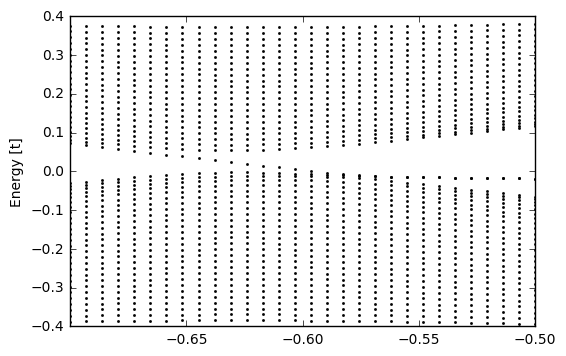

In [13]:
params = copy(ParametersDefault)
params.b0 = 0.05
params.lBinv2 = 1. / 100.**2

evals, evecs = pSweep_1D( fsys_1D, params, -0.7, -0.5, pCount=pzCount, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals, -0.7, -0.5, pzCount)